In [406]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Carga de los datos

In [407]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/cinth90/machinelearning/main/data/Sample%20-%20Superstore.csv', encoding='latin-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [408]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

# Columnas
1. Row ID: Numero unico para cada registro
2. Order ID => Unique Order ID for each Customer.
3. Order Date => Order Date of the product.
4. Ship Date => Shipping Date of the Product.
5. Ship Mode=> Shipping Mode specified by the Customer.
6. Customer ID => Unique ID to identify each Customer.
7. Customer Name => Name of the Customer.
8. Segment => The segment where the Customer belongs.
9. Country => Country of residence of the Customer.
10. City => City of residence of of the Customer.
11. State => State of residence of the Customer.
12. Postal Code => Postal Code of every Customer.
13. Region => Region where the Customer belong.
14. Product ID => Unique ID of the Product.
15. Category => Category of the product ordered.
16. Sub-Category => Sub-Category of the product ordered.
17. Product Name => Name of the Product
18. Sales => Sales of the Product.
19. Quantity => Quantity of the Product.
20. Discount => Discount provided.
21. Profit => Profit/Loss incurred.

In [409]:
df.describe().round().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9994.0,4998.0,2885.0,1.0,2499.0,4998.0,7496.0,9994.0
Postal Code,9994.0,55190.0,32064.0,1040.0,23223.0,56430.0,90008.0,99301.0
Sales,9994.0,230.0,623.0,0.0,17.0,54.0,210.0,22638.0
Quantity,9994.0,4.0,2.0,1.0,2.0,3.0,5.0,14.0
Discount,9994.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Profit,9994.0,29.0,234.0,-6600.0,2.0,9.0,29.0,8400.0


In [410]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

# 1. Preparación de los datos

**Analisis de datos nulos**

El dataset se encuentra limpio de datos nulos como se puede observar al aplicar el metodo df.info()

In [411]:
df.isna().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

# Conversión de datos tipo object a datetime
El objetivo de esta conversión:

*	Extraer el año, mes o día de forma automática.
*	Calcular la diferencia de tiempo entre dos fechas
* Ordenar los datos cronológicamente de manera precisa.


In [413]:
#Conversion de datos de object a datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

#Extracción de año, mes y día para realizar análisis anual, mensual y diario
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Day'] = df['Order Date'].dt.day

df['Ship Year'] = df['Ship Date'].dt.year
df['Ship Month'] = df['Ship Date'].dt.month
df['Ship Day'] = df['Ship Date'].dt.day

In [414]:
#Nueva columna con los dias que tardan en enviarse los pedidos
df['demora_envio'] = (df['Ship Date'] - df['Order Date']).dt.days
df['demora_envio']

,demora_envio
0,3
1,3
2,4
3,7
4,7
...,...
9989,2
9990,5
9991,5
9992,5


# Enriquecimiento de datos:
Al unir mi dataframe con los datos de la Api me permite crear una nueva columna booleana: es_feriado.
Con esta info puedo probar si las demoras tienen relacion la acumulación de feriados nacionales que saturan los servicios de entregas. Si los pedidos hechos en feriados tardan más, la recomendación ejecutiva para la Dirección de Experiencia del Cliente sería: "Ajustar automáticamente la promesa de entrega en la plataforma web cuando se detecte un feriado nacional próximo".

In [415]:
import requests
#años que abarca el dataset de Superstore
años = [2014, 2015, 2016, 2017]
lista_feriados = []

print("Iniciando descarga de feriados desde Nager.Date API...")

for año in años:
    # URL de la API
    url = f"https://date.nager.at/api/v3/PublicHolidays/{año}/US"

    try:
        response = requests.get(url)

        if response.status_code == 200:
            datos = response.json()
            #agrego la palabra año para claridad
            for feriado in datos:
                feriado['año'] = año
                lista_feriados.append(feriado)
        else:
            print(f"Error en el año {año}: Código {response.status_code}")
    except Exception as e:
        print(f"Error de conexión en el año {año}: {e}")

#Guardo el DataFrame nuevo
df_feriados = pd.DataFrame(lista_feriados)

# Selecciono solo las columnas que necesito
df_feriados = df_feriados[['date', 'localName', 'name', 'año']]

# Lo guardo en mi compu y guardo una copia en Github
df_feriados.to_csv('/content/feriados_usa.csv', index=False)

print(f"Se guardaron {len(df_feriados)} feriados en 'feriados_usa.csv'")
df_feriados.head()

Iniciando descarga de feriados desde Nager.Date API...
Se guardaron 60 feriados en 'feriados_usa.csv'


,date,localName,name,año
0,2014-01-01,New Year's Day,New Year's Day,2014
1,2014-01-20,"Martin Luther King, Jr. Day","Martin Luther King, Jr. Day",2014
2,2014-02-12,Lincoln's Birthday,Lincoln's Birthday,2014
3,2014-02-17,Washington's Birthday,Presidents Day,2014
4,2014-04-18,Good Friday,Good Friday,2014


In [416]:
#Cargar feriados de la api
df_feriados = pd.read_csv('feriados_usa.csv')

#Asegurar que las fechas estén en formato datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df_feriados['date'] = pd.to_datetime(df_feriados['date'])

# Creo una 'llave' de fecha (sin horas) para la unión
df['fecha_key'] = df['Order Date'].dt.normalize()
df_feriados['fecha_key'] = df_feriados['date'].dt.normalize()

#hago un left join para unir los dos dataframe
df_enriquecido = pd.merge(df,
                         df_feriados[['fecha_key', 'name']],
                         on='fecha_key',
                         how='left')

# Creo la columna: es_feriado
df_enriquecido['es_feriado'] = df_enriquecido['name'].notna()

#Guardo el nuevo csv
df_enriquecido.to_csv('superstore_enriquecido.csv', index=False)

In [417]:
df_enriquecido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10052 entries, 0 to 10051
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         10052 non-null  int64         
 1   Order ID       10052 non-null  object        
 2   Order Date     10052 non-null  datetime64[ns]
 3   Ship Date      10052 non-null  datetime64[ns]
 4   Ship Mode      10052 non-null  object        
 5   Customer ID    10052 non-null  object        
 6   Customer Name  10052 non-null  object        
 7   Segment        10052 non-null  object        
 8   Country        10052 non-null  object        
 9   City           10052 non-null  object        
 10  State          10052 non-null  object        
 11  Postal Code    10052 non-null  int64         
 12  Region         10052 non-null  object        
 13  Product ID     10052 non-null  object        
 14  Category       10052 non-null  object        
 15  Sub-Category   1005

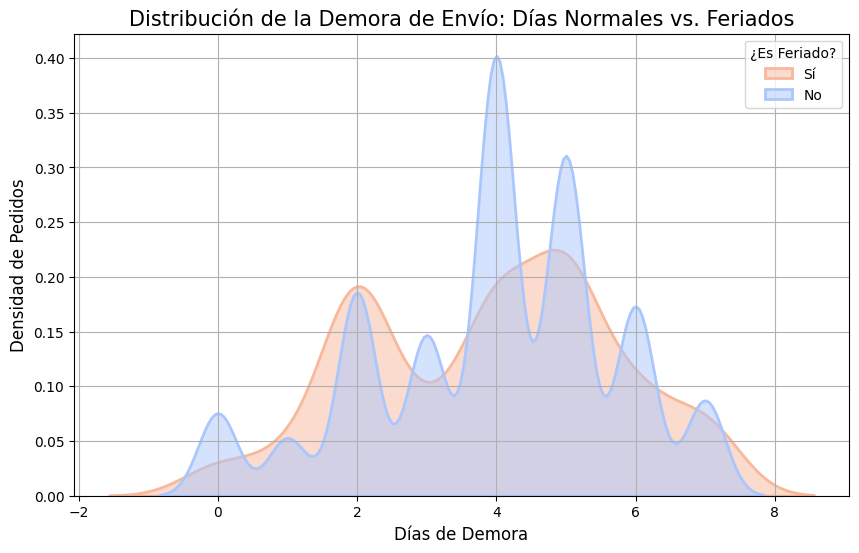

In [418]:
df = pd.read_csv('superstore_enriquecido.csv')

#Grafico de densidad
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='demora_envio', hue='es_feriado', fill=True, common_norm=False, palette='coolwarm', alpha=.5, linewidth=2)
plt.title('Distribución de la Demora de Envío: Días Normales vs. Feriados', fontsize=15)
plt.xlabel('Días de Demora', fontsize=12)
plt.ylabel('Densidad de Pedidos', fontsize=12)
plt.legend(title='¿Es Feriado?', labels=['Sí', 'No'])
plt.grid(True)
plt.show()

Desplazamiento de la expectativa: El retraso no es aleatorio, es sistémico.

Zona de Incumplimiento: Los feriados ensanchan el margen de error.

Acción Sugerida: Ajustar la promesa de entrega cuando se detecte un feriado cercano.

#Limpieza de datos

**Columnas de "Identidad"*

Algunas columnas son identificadores únicos o información muy específica:

* Row ID (un número de fila).

* Order ID (el código del pedido).

* Customer ID y Customer Name (quién compró).

* Product ID y Product Name (qué compró exactamente).

En ciencia de datos, si dejamos el Customer Name en un modelo, este podría "memorizar" que "Juan Pérez" siempre compra mucho, en lugar de aprender que los clientes del segmento "Corporativo" suelen comprar mucho. Esto se llama sobreajuste (overfitting). Eliminar estas columnas es un paso clave para evitar que el modelo se "distraiga" con datos que son únicos para cada pedido y se enfoque en los patrones generales que realmente ayudan a predecir.

Al quitar identificadores como Customer Name o Order ID, aseguramos de que el modelo aprenda, por ejemplo, que los descuentos afectan a una categoría entera y no solo a un cliente específico.

In [419]:
#Elimino columnas con identificadores unicos
df= df.drop(columns=['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Product ID', 'Product Name', 'Postal Code'])

In [420]:
#Todas las ventas son en United States por lo que tambien la elimino
df['Country'].unique()

array(['United States'], dtype=object)

In [421]:
df= df.drop(columns=['Country'])

# Top 10 de ciudades
Al analizar la columna ciudad tengo 531 ciudades diferentes. Por lo que se decidio mantener solo las 10 ciudades con más ventas y agrupar todas las demás bajo la etiqueta "Otras".

In [422]:
top10_ciudades = df['City'].value_counts().index[:10].tolist()#Slicing [:10] para tener el top 10
print(top10_ciudades)

['New York City', 'Los Angeles', 'Philadelphia', 'San Francisco', 'Seattle', 'Houston', 'Chicago', 'Columbus', 'San Diego', 'Springfield']


Si la ciudad está en la lista top10_ciudades, dejo su nombre igual.

Si la ciudad no está en la lista, le cambio el nombre a 'Other'.
Uso el método .apply() con una función lambda.


In [423]:
df['City'] = df['City'].apply(lambda x: x if x in top10_ciudades else 'Others')

In [424]:
df['City'].value_counts()

,count
City,
Others,5645
New York City,927
Los Angeles,752
Philadelphia,537
San Francisco,510
Seattle,430
Houston,381
Chicago,314
Columbus,222


# One-hot encoding para la columna City

•	Ahora la columna City está limpia. Pase de tener 531 datos únicos a tener solo las 10 ciudades con más ventas y Other donde agrupo todas las otras ventas.

In [425]:
#One-hot encoding
df = pd.get_dummies(df, columns=['City'], drop_first=True)

# Analisis exploratorio de datos EDA

# Deteccion de datos atipicos

In [426]:
def generar_hist(df:pd.DataFrame) -> None:
    fig = plt.figure(figsize=(16,9))
    df.hist(bins=10, figsize=(16,9), layout=(3,4),alpha=0.7, edgecolor='black')
    plt.suptitle('Graficos de distribucion', fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()

<Figure size 1600x900 with 0 Axes>

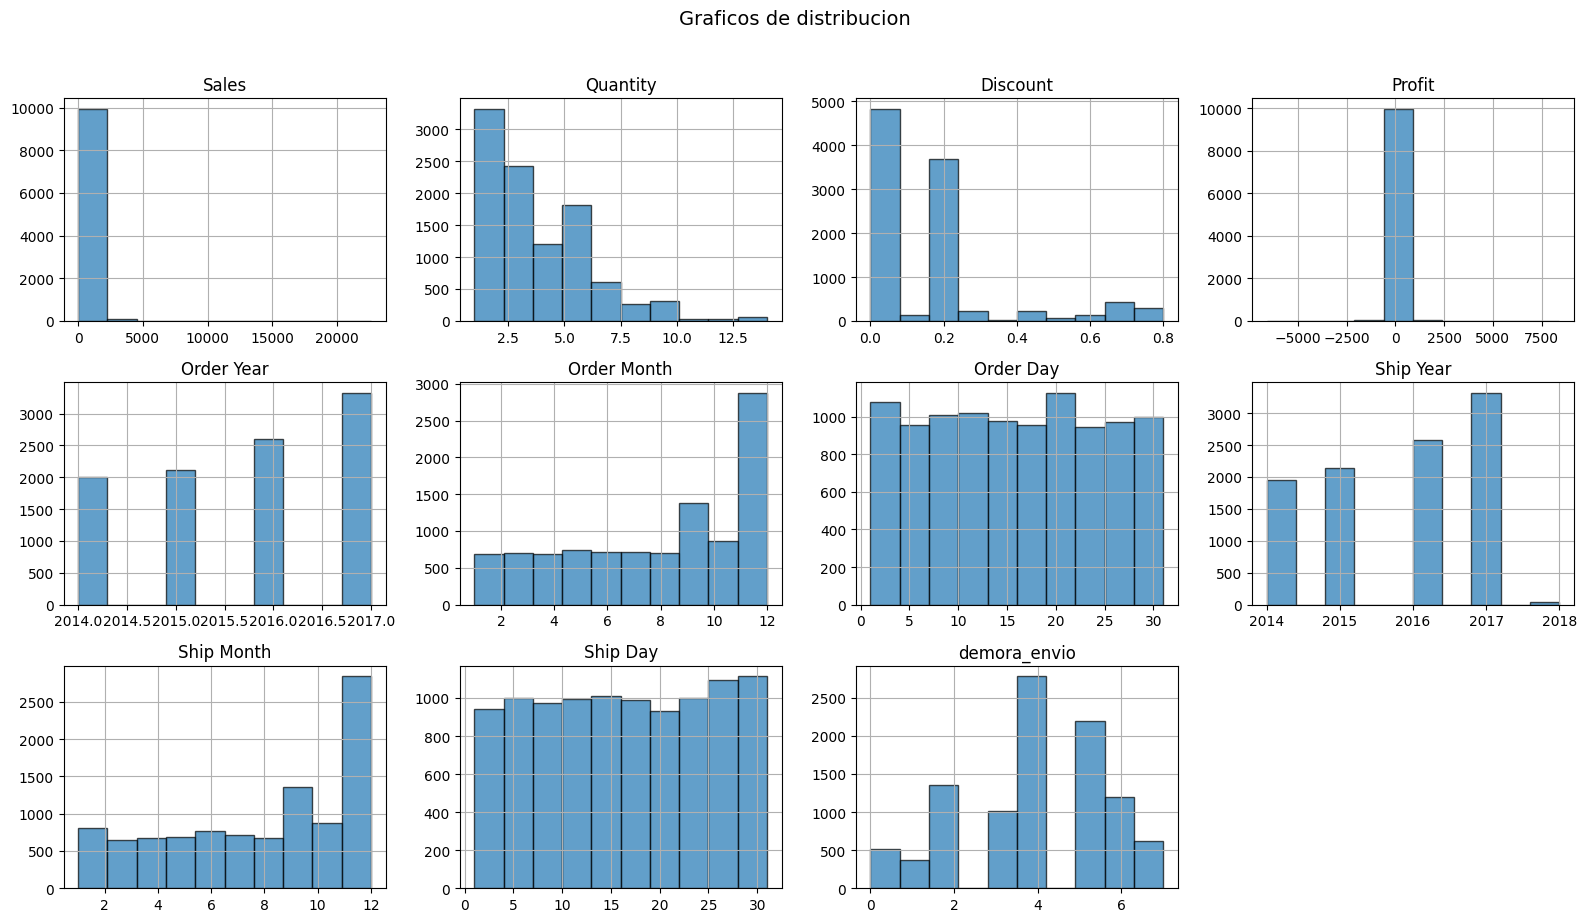

In [427]:
generar_hist(df)

Sales: Muchas ventas chicas, pocas muy grandes.

Profit: Tiene valores negativos lo que indica que hay pérdidas en algunas ventas.

Discount: Se concentran entre 0% y 20%, pero con outliers altos.Los altos descuentos pueden estar destruyendo el margen

demora_envio: hay retrasos frecuentes

Variables de Ship Day / Month / Year están bastante uniformes: no hay un día “dominante” de envíos

Order Month: algunos meses tienen más pedidos podria decirse que hay estacionalidad en ventas

#Hipotesis

Pedidos retrasados afectan la futuras ventas

Asumiendo que los envios:
  * Same day: retrasados cuando df[demora_envio]>0
  * First Class: retrasados cuando df[demora_envio]>1
  * Second Class: retrasados cuando df[demora_envio]>3
  * Standard Class: retrasados cuando df[demora_envio]>5

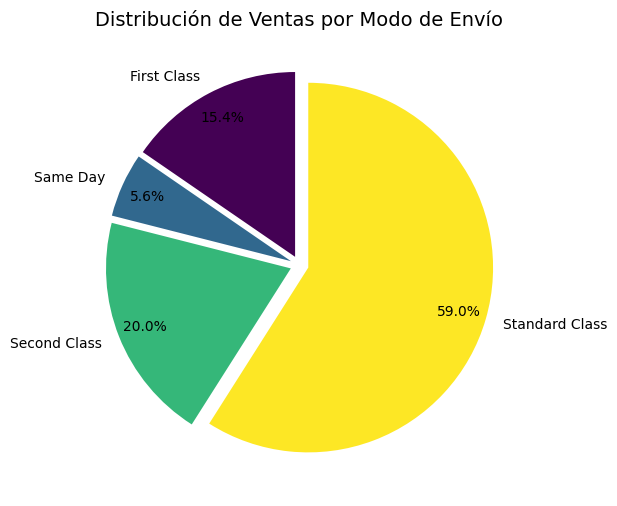

In [428]:
#grafico de ventas por tipo de envio

ventas_x_tipo_envio = df.groupby('Ship Mode')['Sales'].sum()

plt.figure(figsize=(10, 6))
ventas_x_tipo_envio.plot(
    kind='pie',
    autopct='%1.1f%%',      # Agrega los porcentajes con un decimal
    startangle=90,          # Rota el inicio para mejor estética
    cmap='viridis',         # Usa una paleta de colores armónica
    pctdistance=0.85,       # Aleja un poco el porcentaje del centro
    explode=[0.05]*len(ventas_x_tipo_envio) # Separa ligeramente las tajadas
)

plt.title('Distribución de Ventas por Modo de Envío', fontsize=14)
plt.ylabel('') # Elimina la etiqueta 'Sales' del eje Y
plt.show()

Del total de mis ventas 79% son envios Standard Class y Second Class. Por lo que se van a analizar las demoras solo para estas.

In [429]:
df.groupby('demora_envio')['Ship Mode'].value_counts()

demora_envio  Ship Mode     
0             Same Day           520
1             First Class        346
              Same Day            24
              Second Class         1
2             Second Class       767
              First Class        590
3             First Class        626
              Second Class       380
              Standard Class       2
4             Standard Class    2410
              Second Class       371
              First Class          1
5             Standard Class    1755
              Second Class       435
6             Standard Class    1203
7             Standard Class     621
Name: count, dtype: int64

In [430]:
#condiciones lógicas
condiciones = [
    (df['Ship Mode'] == 'Same Day') & (df['demora_envio'] > 0),
    (df['Ship Mode'] == 'First Class') & (df['demora_envio'] > 1),
    (df['Ship Mode'] == 'Second Class') & (df['demora_envio'] > 3),
    (df['Ship Mode'] == 'Standard Class') & (df['demora_envio'] > 5)
]

# En todos estos casos, el resultado será True si cumple la condicion
valores = [True, True, True, True]

#'default': False (si no cumple ninguna condición)
df['retrasado'] = np.select(condiciones, valores, default=False)

# Verifico los primeros resultados
print(df[['Ship Mode', 'demora_envio', 'retrasado']].head(10))

        Ship Mode  demora_envio  retrasado
0    Second Class             3      False
1    Second Class             3      False
2    Second Class             4       True
3  Standard Class             7       True
4  Standard Class             7       True
5  Standard Class             5      False
6  Standard Class             5      False
7  Standard Class             5      False
8  Standard Class             5      False
9  Standard Class             5      False


In [431]:
df['Ship Mode'].value_counts()

,count
Ship Mode,
Standard Class,5991
Second Class,1954
First Class,1563
Same Day,544


In [432]:
df.groupby('retrasado')['Ship Mode'].value_counts()

retrasado  Ship Mode     
False      Standard Class    4167
           Second Class      1148
           Same Day           520
           First Class        346
True       Standard Class    1824
           First Class       1217
           Second Class       806
           Same Day            24
Name: count, dtype: int64

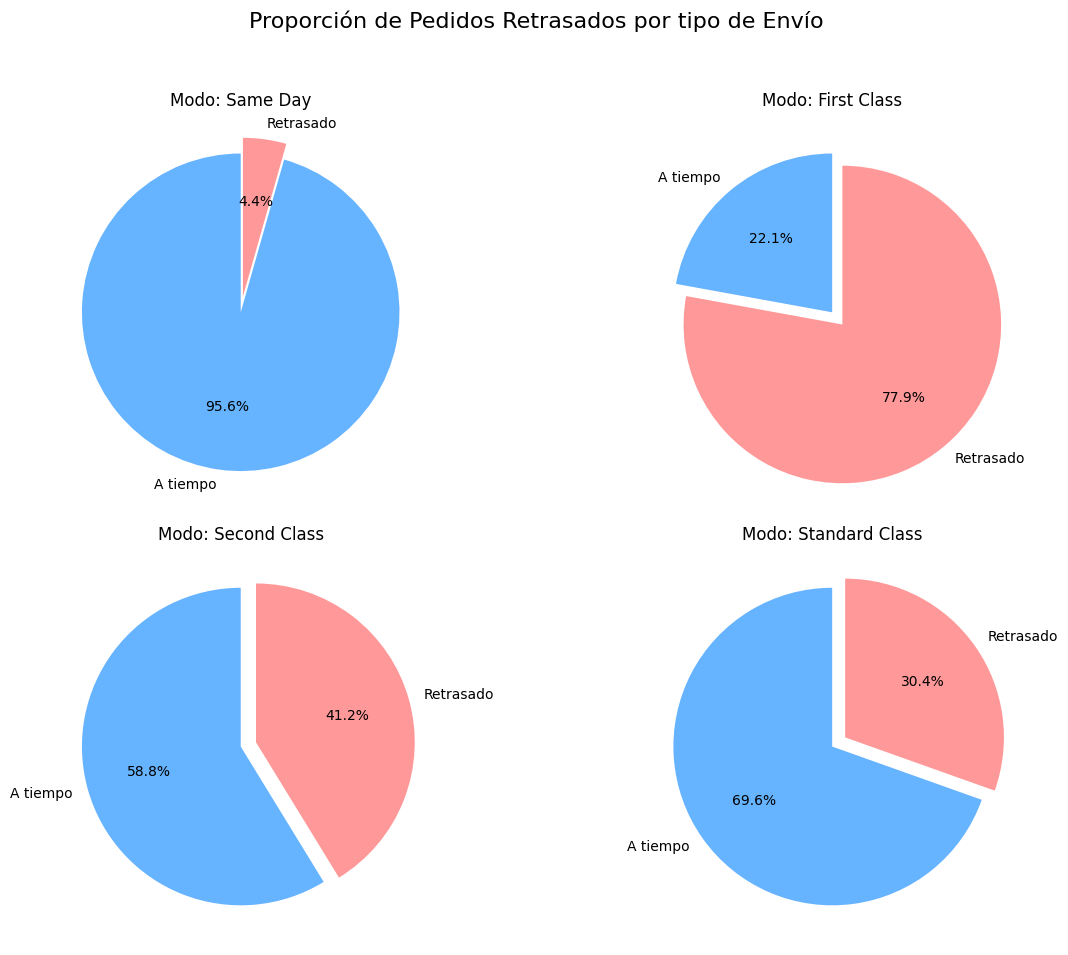

In [433]:
#Lista de categorías únicas de envío
categorias = ['Same Day', 'First Class', 'Second Class', 'Standard Class']


fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten() # Convertimos la matriz de 2x2 en una lista plana para iterar fácilmente

# Colores--> Azul: a tiempo, Rojo: retrasado
colores = ['#66b3ff', '#ff9999']

#For para iterar sobre cada categoría para crear su gráfico
for i, cat in enumerate(categorias):
    # Filtrar el DataFrame por categoría y contar valores de la columna 'retrasado'
    conteo = df[df['Ship Mode'] == cat]['retrasado'].value_counts()

    # Extraer los valores (asegurando el orden False, True)
    valores = [conteo.get(False, 0), conteo.get(True, 0)]
    etiquetas = ['A tiempo', 'Retrasado']

    # Crear el gráfico de torta en el eje correspondiente
    axs[i].pie(valores,
               labels=etiquetas,
               autopct='%1.1f%%',
               startangle=90,
               colors=colores,
               explode=(0, 0.1)) # Resaltar la porción de 'Retrasado'

    axs[i].set_title(f'Modo: {cat}')
plt.suptitle('Proporción de Pedidos Retrasados por tipo de Envío', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

En Este grafico se ven los dos tipos de envios a analizar:
* Second Class: El 41.2% de los envios se han retrasado. Tengo 806 retrasos de los 1954 pedidos.
* Standar Class: El 30.4% de los envios se han retrasado. Tengo 1824 retrasos de los 5991 pedidos.

#Hipotesis:
Los grandes descuentos hacen perder plata a la empresa. A partir de que % de descuento se generan perdidas?

In [434]:
df.groupby(pd.cut(df['Discount'], bins=5))['Profit'].mean()

/tmp/ipython-input-371/3773591243.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.cut(df['Discount'], bins=5))['Profit'].mean()


,Profit
Discount,
"(-0.0008, 0.16]",66.863290
"(0.16, 0.32]",19.795228
"(0.32, 0.48]",-117.266695
"(0.48, 0.64]",-130.099773
"(0.64, 0.8]",-98.244390


descuentos > 32% dan profit negativo

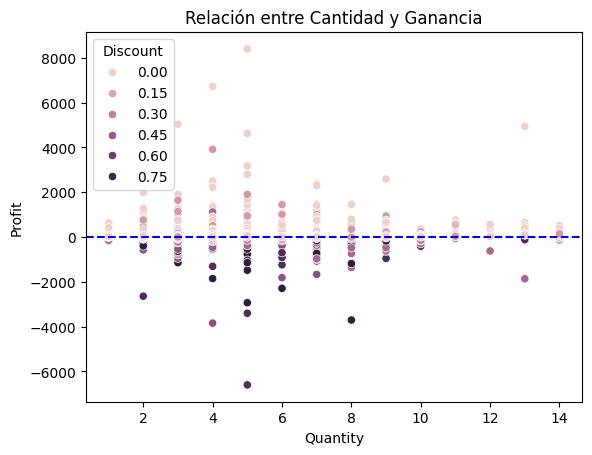

In [435]:
sns.scatterplot(x=df['Quantity'], y=df['Profit'], hue=df['Discount'])
#línea en 0 para ver mejor las pérdidas
plt.axhline(0, color='blue', linestyle='--')
plt.title('Relación entre Cantidad y Ganancia')
plt.show()

In [436]:
#Profit por categoría
df.groupby(['Category'])['Profit'].mean()

,Profit
Category,
Furniture,8.521135
Office Supplies,20.268319
Technology,78.599484


/tmp/ipython-input-371/4100444049.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=df, x='Category', y='Profit', kind='bar', palette='magma')


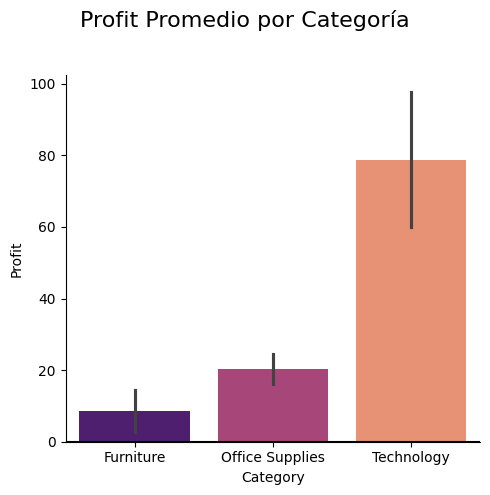

In [437]:
g = sns.catplot(data=df, x='Category', y='Profit', kind='bar', palette='magma')

#Agrego la línea en el cero
g.map(plt.axhline, y=0, color='black', linestyle='-', linewidth=1.5)

plt.subplots_adjust(top=0.85)
g.fig.suptitle('Profit Promedio por Categoría', fontsize=16)

plt.show()

Profit por categoría y región

In [438]:
#Profit por categoría y región
df.groupby(['Category', 'Region'])['Profit'].mean()

Category         Region 
Furniture        Central    -6.998768
                 East        5.322272
                 South      20.237198
                 West       16.393434
Office Supplies  Central     6.247128
                 East       23.856144
                 South      19.993716
                 West       27.679942
Technology       Central    80.370521
                 East       88.586060
                 South      68.014265
                 West       73.638175
Name: Profit, dtype: float64

/tmp/ipython-input-371/3412966280.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=df, x='Region', y='Profit', col='Category', kind='bar', palette='magma')


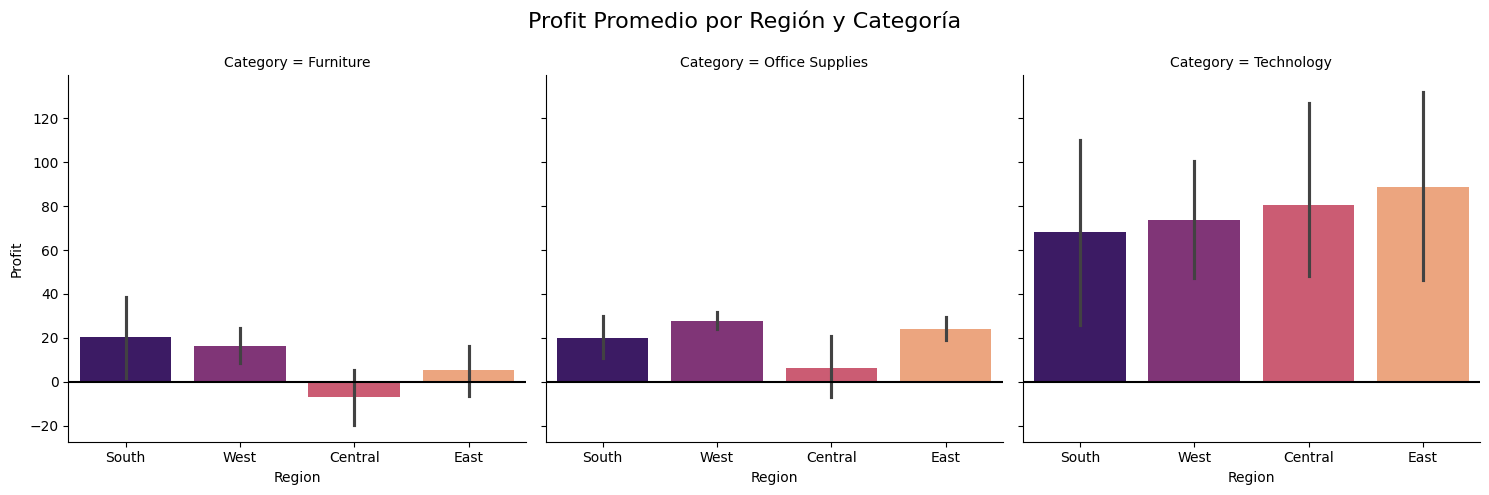

In [439]:
g = sns.catplot(data=df, x='Region', y='Profit', col='Category', kind='bar', palette='magma')

#Agrego la línea en el cero
g.map(plt.axhline, y=0, color='black', linestyle='-', linewidth=1.5)

plt.subplots_adjust(top=0.85)
g.fig.suptitle('Profit Promedio por Región y Categoría', fontsize=16)

plt.show()

1. Dominio de la categoría "Technology"
Mayor rentabilidad: Sin duda, es la categoría estrella. Todas las regiones presentan un profit promedio significativamente superior (entre 70 y 90 aproximadamente) al de las otras categorías.

Región Líder: La región East es la más rentable para tecnología, aunque también presenta una alta variabilidad (línea negra vertical larga), lo que indica que hay ventas con ganancias masivas y otras más modestas.

2. El problema crítico de "Furniture" en la región Central
Pérdidas operativas: Es el único punto del gráfico donde el profit promedio cae por debajo de la línea del cero.

Conclusión: La venta de muebles en la región Central no es rentable. Esto podría deberse a costos de envío muy altos, descuentos agresivos o precios mal calculados para esa zona específica.

3. Estabilidad en "Office Supplies"
Rendimiento constante: Es una categoría muy "sana". Aunque las ganancias no son tan altas como en tecnología, todas las regiones son rentables.

Menor riesgo: Las líneas de error (las barras negras verticales) son más cortas que en Tecnología, lo que sugiere que los márgenes de ganancia son más predecibles y estables.

4. Comparativa Regional General
East (Este): Parece ser la región más fuerte para Tecnología y suministros de oficina, pero la más débil para muebles (apenas supera el cero).

South (Sur) y West (Oeste): Mantienen un desempeño equilibrado y positivo en las tres categorías, siendo opciones seguras para la inversión.

In [440]:
# quiero ver los registro de region central por categoria donde profit es negativo
df_perdidascentral= df[(df['Region'] == 'Central') & (df['Profit'] < 0)]
df_perdidascentral.groupby('Category')['Discount'].value_counts()

Category         Discount
Furniture        0.60        139
                 0.30        136
                 0.32         27
                 0.50         20
Office Supplies  0.80        301
                 0.20         75
Technology       0.20         40
                 0.40          8
                 0.30          1
Name: count, dtype: int64

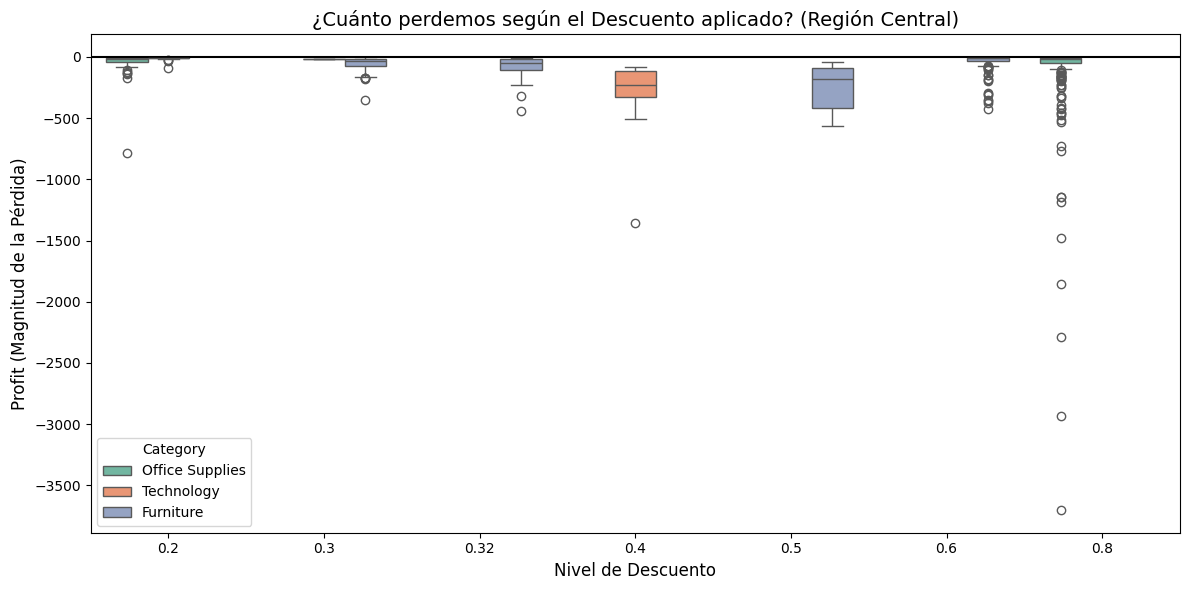

In [441]:
plt.figure(figsize=(12, 6))
# Muestra como varía el Profit (negativo) según el nivel de descuento
sns.boxplot(data=df_perdidascentral, x='Discount', y='Profit', hue='Category', palette='Set2')

plt.axhline(0, color='black', linestyle='-', linewidth=1.5) # Línea de referencia
plt.title('¿Cuánto perdemos según el Descuento aplicado? (Región Central)', fontsize=14)
plt.xlabel('Nivel de Descuento', fontsize=12)
plt.ylabel('Profit (Magnitud de la Pérdida)', fontsize=12)

plt.tight_layout()
plt.show()

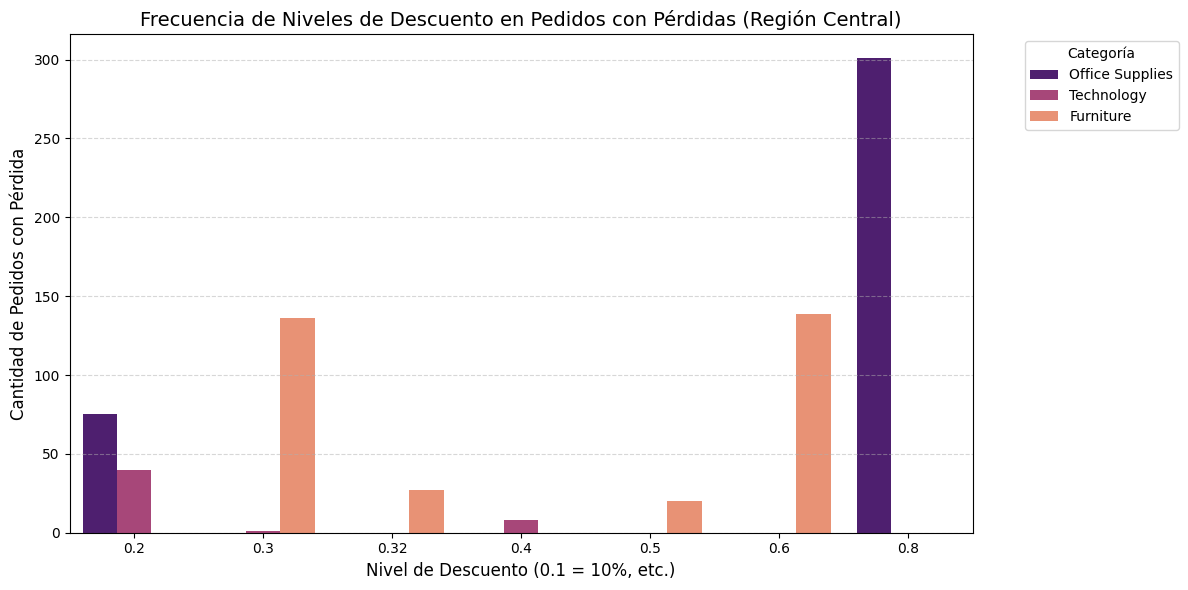

In [442]:
plt.figure(figsize=(12, 6))
#countplot para ver cuántas veces aparece cada descuento en los registros con pérdidas
sns.countplot(data=df_perdidascentral, x='Discount', hue='Category', palette='magma')

plt.title('Frecuencia de Niveles de Descuento en Pedidos con Pérdidas (Región Central)', fontsize=14)
plt.xlabel('Nivel de Descuento (0.1 = 10%, etc.)', fontsize=12)
plt.ylabel('Cantidad de Pedidos con Pérdida', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

**. Análisis de Pérdidas por Descuento (Región Central)**
Correlación Negativa entre Descuento y Profit: El gráfico de cajas confirma que a medida que aumenta el nivel de descuento, la magnitud de la pérdida se vuelve más extrema y frecuente.

* Puntos de Quiebre Críticos:

  * Descuentos del 80% (0.8): Son los más perjudiciales, especialmente para Office Supplies, generando pérdidas masivas que alcanzan niveles inferiores a -3500.

   * Muebles (Furniture): Comienza a mostrar una tendencia clara de pérdida con descuentos a partir del 0.32.

  * Tecnología (Technology): Aunque es rentable en promedio, sufre pérdidas profundas cuando se aplican descuentos del 0.4.

**Frecuencia de Pedidos con Pérdida**
* Volumen Masivo en Office Supplies: Existe una frecuencia alarmante de más de 300 pedidos con pérdida en Office Supplies vinculados específicamente al nivel de descuento de 0.8.

* Frecuencia en Furniture: Esta categoría presenta una cantidad significativa de pedidos con pérdida distribuidos en niveles de descuento de 0.3 y 0.6 (aproximadamente 140 pedidos en cada nivel).

**Conclusión Estratégica**
El principal motor de las pérdidas en la Región Central no es la falta de ventas, sino una política de descuentos agresiva e insostenible. Se recomienda limitar drásticamente los descuentos superiores al 20% en la categoría Furniture y eliminar por completo los descuentos del 80% en Office Supplies, ya que el volumen de pedidos bajo esta condición está destruyendo el valor del negocio.

# Analisis de datos atipicos para Sales

In [443]:
sales_outlier = df[df['Sales'] > 20000]
sales_outlier[['Sales', 'Profit', 'Discount','Sub-Category', 'Quantity']]

,Sales,Profit,Discount,Sub-Category,Quantity
2714,22638.48,-1811.0784,0.5,Machines,6


Aplicaron un 50% de descuento ($0.5$). Es una locura para un monto tan alto! Por eso, a pesar de vender muchísimo, terminaron perdiendo $-1,811$.

# Analisis de datos atipicos para Profit

In [444]:
profit_outlier = df[df['Profit'] < -6000]
profit_outlier[['Sales','Profit','Discount','Sub-Category','Quantity']]

,Sales,Profit,Discount,Sub-Category,Quantity
7818,4499.985,-6599.978,0.7,Machines,5


 Vendieron $4,499$ pero aplicaron un 70% de descuento ($0.7$). El resultado fue una pérdida catastrófica de $-6,599$

# Limpieza de outliers. Metodo IQR

In [445]:
def limpiar_outliers(df, columna):
  Q1 = df[columna].quantile(0.25)
  Q3 = df[columna].quantile(0.75)
  IQR = Q3 - Q1
  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR
  return df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]

In [446]:
print(f"Registros originales: {len(df)}")
df = limpiar_outliers(df,'Sales')
df = limpiar_outliers(df, 'Profit')
print(f"Registros tras la limpieza: {len(df)}")

Registros originales: 10052
Registros tras la limpieza: 7434


<Axes: ylabel='Sales'>

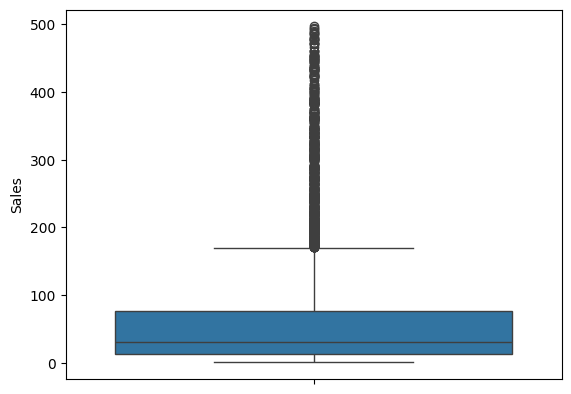

In [447]:
sns.boxplot(df['Sales'])

<Axes: ylabel='Profit'>

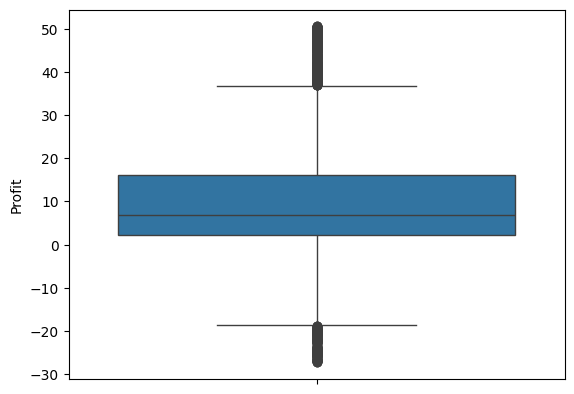

In [448]:
sns.boxplot(df['Profit'])

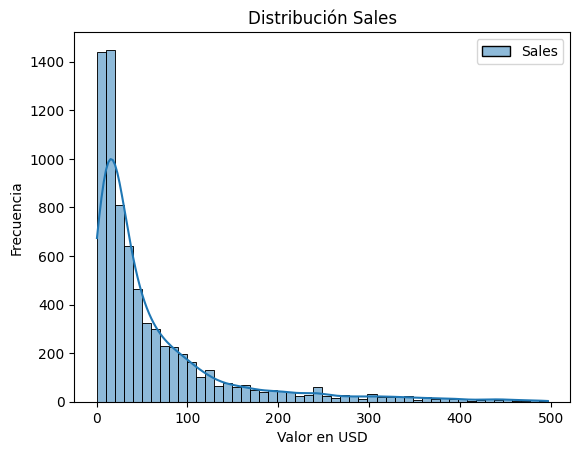

In [449]:
#Histograma de sales
sns.histplot(data=df[['Sales']], bins=50, kde=True)

plt.title('Distribución Sales')
plt.xlabel('Valor en USD')
plt.ylabel('Frecuencia')
plt.show()

La "Montaña" Inicial: Las barras más altas están concentradas entre los 0 y 50 USD. Esto significa que hay una cantidad masiva de transacciones (más de 1400) por montos muy bajos.

La "Cola" Larga: A medida que el valor en USD aumenta hacia los 400 o 500 USD, las barras se vuelven casi invisibles. Estos son los pedidos grandes, pero ocurren con muy poca frecuencia.

Esta estructura es característica de un modelo de negocio basado en el volumen. El éxito aquí no depende de vender un solo producto de lujo muy caro, sino de la acumulación de miles de ventas pequeñas.

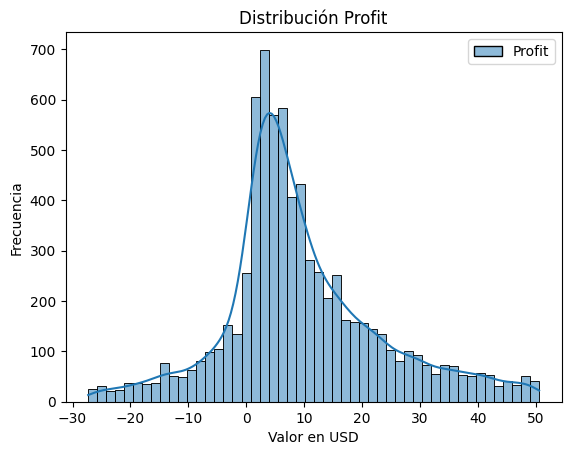

In [450]:
#Histograma de Profit
sns.histplot(data=df[['Profit']], bins=50, kde=True)

plt.title('Distribución Profit')
plt.xlabel('Valor en USD')
plt.ylabel('Frecuencia')
plt.show()

Aunque el negocio es mayoritariamente rentable, las ganancias por cada venta son mínimas. Necesitas un volumen masivo de operaciones para acumular una ganancia total significativa. . Muchas ventas terminan costándole dinero al negocio (entre -1 y -30 USD). Al estar tan cerca del punto de equilibrio (cero), cualquier pequeño error en el envío o un descuento mal aplicado convierte una ganancia en pérdida. El gráfico muestra un negocio que "sobrevive" gracias a miles de pequeñas ganancias que apenas logran compensar las miles de pequeñas pérdidas.

In [451]:
#Top 10 de Ventas por sub-category
top_10_ventas = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(10)
print("\n--- Top 10 Sub-Categorías ---")
for nombre, venta in zip(top_10_ventas.index, top_10_ventas):
    print(f"{nombre}: ${venta:,.2f}")


--- Top 10 Sub-Categorías ---
Phones: $70,378.62
Storage: $64,570.03
Chairs: $58,659.87
Accessories: $46,707.26
Furnishings: $45,377.37
Paper: $38,448.15
Binders: $30,118.32
Appliances: $22,485.37
Art: $21,922.22
Bookcases: $21,858.56


In [452]:
#Top 10 de Ganancias por sub-category
top_10_Ganancias = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(10)
nombres_top_10_Ganancias = top_10_Ganancias.index
print("\n--- Top 10 Sub-Categorías (Nombres) ---")
for nombre, Ganancia in zip(nombres_top_10_Ganancias, top_10_Ganancias):
    print(f"{nombre}: ${Ganancia:,.2f}")


--- Top 10 Sub-Categorías (Nombres) ---
Paper: $16,208.10
Furnishings: $8,372.74
Accessories: $7,845.76
Phones: $7,446.86
Binders: $5,570.13
Art: $5,203.75
Storage: $4,959.52
Appliances: $4,292.24
Labels: $3,276.01
Envelopes: $3,113.55


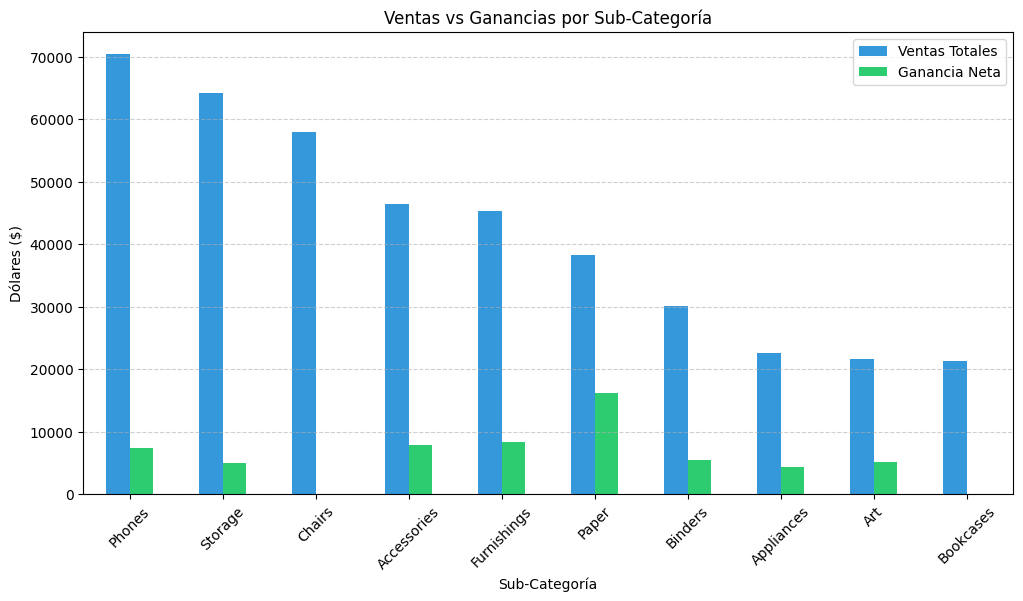

In [453]:
#Voy a armar un nuevo dataframe con el top 10 de ventas y ganancias por sub-category
datos_combinados = {
    'Sub-Category': ['Phones', 'Storage', 'Chairs', 'Accessories', 'Furnishings', 'Paper', 'Binders', 'Appliances', 'Art', 'Bookcases'],
    'Sales': [70392.71, 64172.87, 57976.05, 46412.64, 45243.03, 38317.44, 30063.86, 22485.37, 21633.13, 21301.86],
    'Profit': [7339.05, 4953.22, 0, 7806.93, 8349.76, 16149.21, 5500.41, 4292.24, 5137.97, 0]
}

df_top = pd.DataFrame(datos_combinados).set_index('Sub-Category')

# Grafico
df_top.plot(kind='bar', figsize=(12, 6), color=['#3498db', '#2ecc71'])

plt.title('Ventas vs Ganancias por Sub-Categoría')
plt.ylabel('Dólares ($)')
plt.xlabel('Sub-Categoría')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(['Ventas Totales', 'Ganancia Neta'])
plt.show()

Phones/Storage: Tienen ventas altísimas, pero la ganancia es muy pequeña en comparación. Mueven mucho dinero, pero se quedan con poco.

Paper: Sus ventas no son las más altas, pero su barra verde es la más grande de todas. Es, por mucho, el producto más eficiente y rentable.

Chairs/Bookcases: Aparecen las Sillas y Libreros en el top de ventas, pero en el top de ganancias... ¡desaparecieron! Esto confirma que vender muebles es un esfuerzo enorme que no está dejando frutos.

Paper gana más dinero que Phones a pesar de que vende casi la mitad.

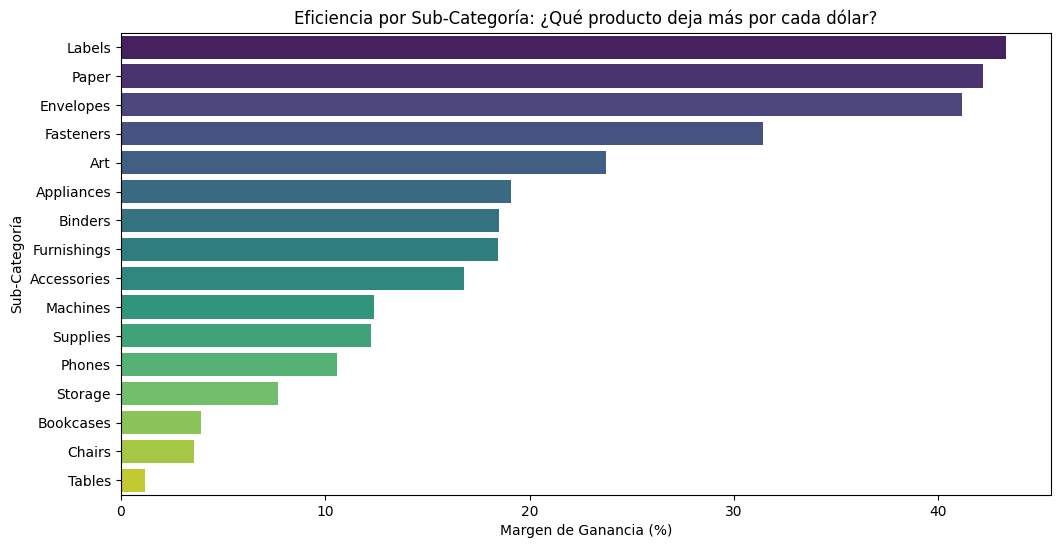

In [454]:
# Agrupamos y sumamos
resumen = df.groupby('Sub-Category')[['Sales', 'Profit']].sum()

# Calculo el margen porcentual
resumen['Margin %'] = (resumen['Profit'] / resumen['Sales']) * 100

# Orden por margen de mayor a menor
resumen = resumen.sort_values('Margin %', ascending=False)

#Grafico de la eficiencia
plt.figure(figsize=(12, 6))
sns.barplot(x=resumen['Margin %'], y=resumen.index, palette='viridis', hue=resumen.index, legend=False)
plt.title('Eficiencia por Sub-Categoría: ¿Qué producto deja más por cada dólar?')
plt.xlabel('Margen de Ganancia (%)')
plt.ylabel('Sub-Categoría')
plt.show()

* Labels: Tiene un volumen bajo de ventas pero un altisimo margen de ganacia.

* Paper: Tiene un margen impresionante de ~42%. Aunque no es el que más vende en monto total, es el que mejor usa el dinero.

* Art: Tiene un margen de ~23%. Muy eficiente.

* Phones: Aunque es el "Top 1" en ventas, su margen es apenas del ~10%. Es un producto de mucho movimiento pero poco margen.

In [455]:
#Total de ventas de labels
ventas_labels = df[df['Sub-Category'] == "Labels"]['Sales'].sum()

print(f"Total de Ventas de Labels: ${ventas_labels:,.2f}")

Total de Ventas de Labels: $7,561.06


Si comparo la venta (usd7561)  con los $3,276.01 de ganancia,se ve que el margen de beneficio es altísimo.
Esto confirma que Labels es uno de los "pequeños grandes héroes" de la empresa:
* Ventas: Volumen bajo (no requiere mover grandes almacenes o logística compleja).
* Ganancia: Aporta casi tanto dinero limpio como categorías que venden 5 o 6 veces más (como Storage).

# Caul es la region mas rentable?

In [456]:
#region mas rentable
profit_region = df.groupby('Region')['Profit'].sum()
profit_region

,Profit
Region,
Central,11297.2232
East,19783.7802
South,11561.2963
West,29026.7382


/tmp/ipython-input-371/2336832421.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profit_region.index, y=profit_region.values, palette='viridis')


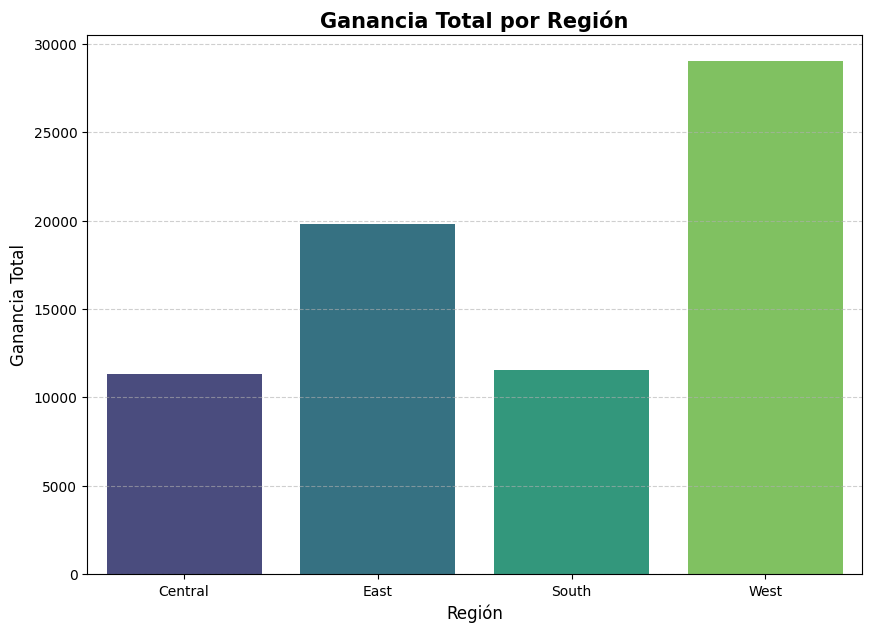

In [457]:
plt.figure(figsize=(10, 7))
sns.barplot(x=profit_region.index, y=profit_region.values, palette='viridis')
plt.title('Ganancia Total por Región', fontsize=15, fontweight='bold')
plt.xlabel('Región', fontsize=12)
plt.ylabel('Ganancia Total', fontsize=12)

#cuadrícula ligera para mejorar la lectura
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

In [458]:
profit_region['porcentaje'] = (profit_region / profit_region.sum()) * 100
print(profit_region['porcentaje'])


Region
Central    15.763046
East       27.604361
South      16.131508
West       40.501085
Name: Profit, dtype: float64


* Dominio de la region West: Con un 40.5% de la ganancia total, la región West es, por mucho, el motor financiero de la empresa. Casi la mitad de todo el dinero limpio que entra viene de esta zona.
* La región East aporta un sólido 27.6%, manteniéndose como un mercado fuerte y estable.
* South y Central: Ambas regiones están prácticamente empatadas en el último
lugar (16.13% y 15.76% respectivamente).

# Encoding


In [459]:
# Filtro solo las columnas de tipo objeto y cuento sus valores únicos

columnas_categoricas = df.select_dtypes(include=['object']).columns
print(df[columnas_categoricas].nunique())

Order Date      1200
Ship Date       1293
Ship Mode          4
Segment            3
State             48
Region             4
Category           3
Sub-Category      16
fecha_key       1200
name              14
dtype: int64


#Metodos a utilizar segun la cardinalidad

 * **One-Hot Encoding**: Las columnas Segment, Region, Category, Ship Mode tienen muy pocas categorias. Crea nuevas columnas y le asigna valores 0 y 1.

* **Label Encoding**:  Las columnas Sub-Category, State tienen entre 10 y 50 valores. Se asigna un valor entero único a cada categoría de la columna.

* Las columnas Customer ID, Product Name, City tienen cientos de valores unicos por lo que no se tendran en cuenta al momento de codificar.

El Label Encoding es muy eficiente porque no aumenta el tamaño del dataset, pero tiene una trampa: los modelos matemáticos podrían pensar que un "3" es más importante o "mayor" que un "1" (orden jerárquico), cuando en realidad son solo etiquetas de productos diferentes.Por eso, esta técnica se recomienda principalmente para modelos basados en árboles de decisión (como Random Forest), que no se confunden con los números.

In [460]:
#One-hot Encoding
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [461]:
df= pd.get_dummies(df, columns=['Ship Mode'], drop_first=True)
#Esto hace que el dataset sea matemáticamente más eficiente para el modelo

In [462]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7434 entries, 0 to 10050
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Order Date                7434 non-null   object 
 1   Ship Date                 7434 non-null   object 
 2   Segment                   7434 non-null   object 
 3   State                     7434 non-null   object 
 4   Region                    7434 non-null   object 
 5   Category                  7434 non-null   object 
 6   Sub-Category              7434 non-null   object 
 7   Sales                     7434 non-null   float64
 8   Quantity                  7434 non-null   int64  
 9   Discount                  7434 non-null   float64
 10  Profit                    7434 non-null   float64
 11  Order Year                7434 non-null   int64  
 12  Order Month               7434 non-null   int64  
 13  Order Day                 7434 non-null   int64  
 14  Ship Year   

In [463]:
#Codifico las otras dos columnas juntas con la misma logica que ship mode
df = pd.get_dummies(df, columns=['Category', 'Region', 'Segment'], drop_first=True)

In [464]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7434 entries, 0 to 10050
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Order Date                7434 non-null   object 
 1   Ship Date                 7434 non-null   object 
 2   State                     7434 non-null   object 
 3   Sub-Category              7434 non-null   object 
 4   Sales                     7434 non-null   float64
 5   Quantity                  7434 non-null   int64  
 6   Discount                  7434 non-null   float64
 7   Profit                    7434 non-null   float64
 8   Order Year                7434 non-null   int64  
 9   Order Month               7434 non-null   int64  
 10  Order Day                 7434 non-null   int64  
 11  Ship Year                 7434 non-null   int64  
 12  Ship Month                7434 non-null   int64  
 13  Ship Day                  7434 non-null   int64  
 14  demora_envio

In [465]:
#label encoding
from sklearn.preprocessing import LabelEncoder

#creo el objeto encoder
encoder1 = LabelEncoder()

#aplico la transformacion a la columna Sub-Category
df['Sub-Category'] = encoder1.fit_transform(df['Sub-Category']).astype(int)

In [466]:
df['Sub-Category'].unique()

array([ 4,  9, 13,  8,  2,  3,  1, 11, 12,  5,  0,  6,  7, 14, 10, 15])

In [467]:
#label encoding
from sklearn.preprocessing import LabelEncoder

#creo el objeto encoder
encoder = LabelEncoder()

#aplico la transformacion a la columna State
df['State'] = encoder.fit_transform(df['State']).astype(int)

In [468]:
df['State'].unique()

array([15,  3,  8, 31, 41, 42, 25, 36, 11, 21, 20,  6, 12, 30, 44, 40,  0,
       38, 35,  4, 13, 33,  1, 47, 45, 34, 29, 16,  5, 28, 19,  9, 26, 37,
       23, 24, 22, 27, 18,  2,  7, 14, 17, 39, 10, 32, 46, 43])

# Matriz de Correlación- Heatmap

In [469]:
df.columns

Index(['Order Date', 'Ship Date', 'State', 'Sub-Category', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Order Year', 'Order Month', 'Order Day',
       'Ship Year', 'Ship Month', 'Ship Day', 'demora_envio', 'fecha_key',
       'name', 'es_feriado', 'City_Columbus', 'City_Houston',
       'City_Los Angeles', 'City_New York City', 'City_Others',
       'City_Philadelphia', 'City_San Diego', 'City_San Francisco',
       'City_Seattle', 'City_Springfield', 'retrasado', 'Ship Mode_Same Day',
       'Ship Mode_Second Class', 'Ship Mode_Standard Class',
       'Category_Office Supplies', 'Category_Technology', 'Region_East',
       'Region_South', 'Region_West', 'Segment_Corporate',
       'Segment_Home Office'],
      dtype='object')

In [470]:
columnas_claves =['State', 'Sub-Category', 'Sales', 'Quantity',
       'Discount', 'Profit', 'demora_envio',
       'es_feriado', 'City_Columbus', 'City_Houston',
       'City_Los Angeles', 'City_New York City', 'City_Others',
       'City_Philadelphia', 'City_San Diego', 'City_San Francisco',
       'City_Seattle', 'City_Springfield', 'retrasado', 'Ship Mode_Same Day',
       'Ship Mode_Second Class', 'Ship Mode_Standard Class',
       'Category_Office Supplies', 'Category_Technology', 'Region_East',
       'Region_South', 'Region_West', 'Segment_Corporate',
       'Segment_Home Office']
matriz = df[columnas_claves].corr()

<Axes: >

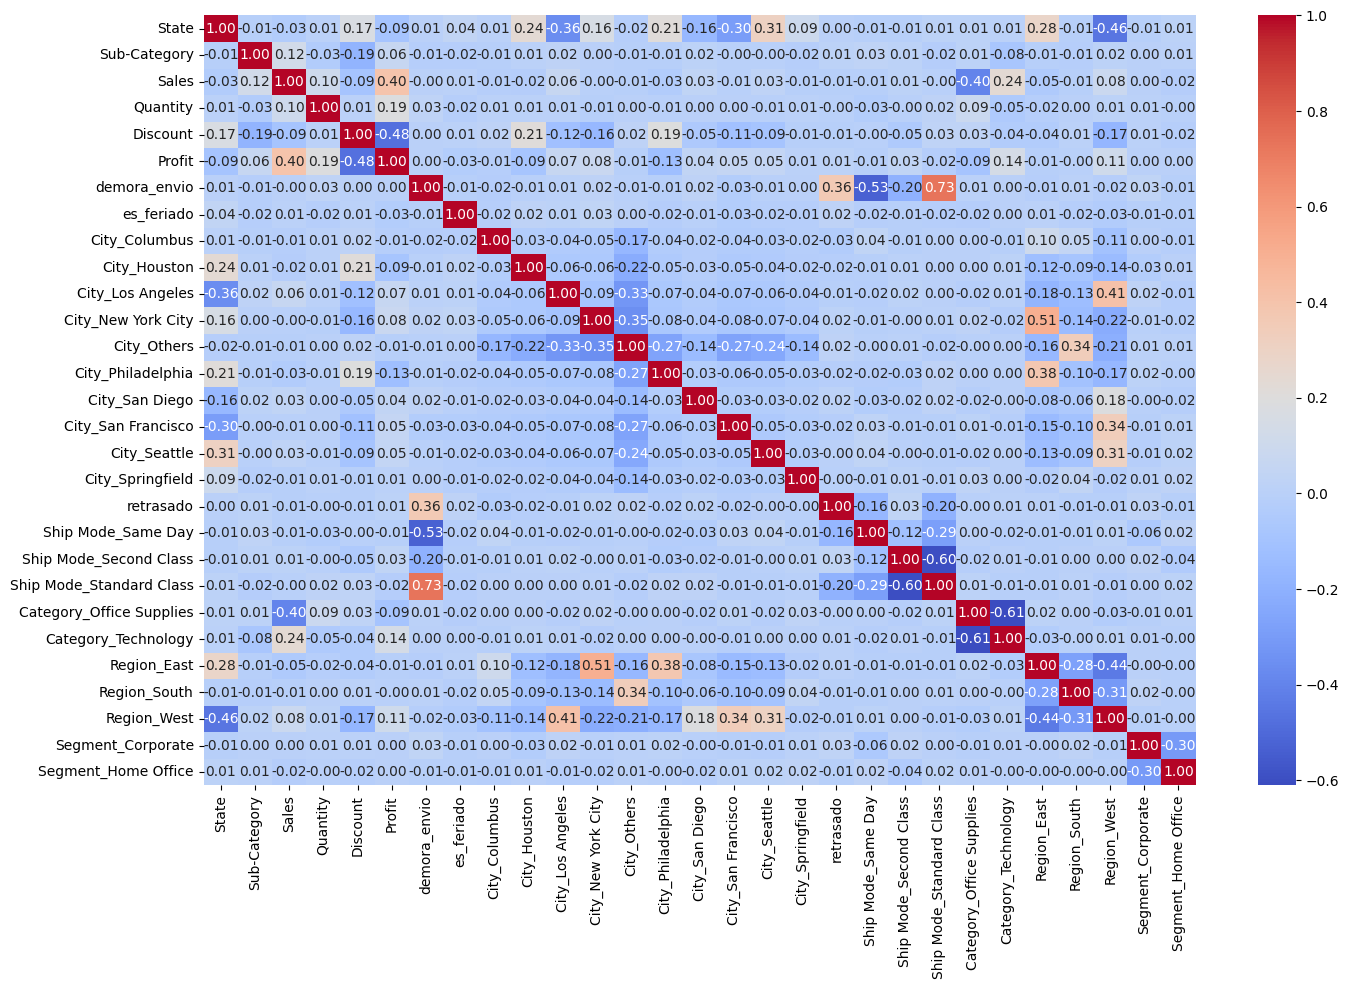

In [471]:
plt.figure(figsize=(16, 10))
sns.heatmap(matriz, annot=True, cmap='coolwarm', fmt=".2f")

In [472]:
columnas_claves =['Sales', 'Quantity',
       'Discount', 'Profit', ]
matriz = df[columnas_claves].corr()

<Axes: >

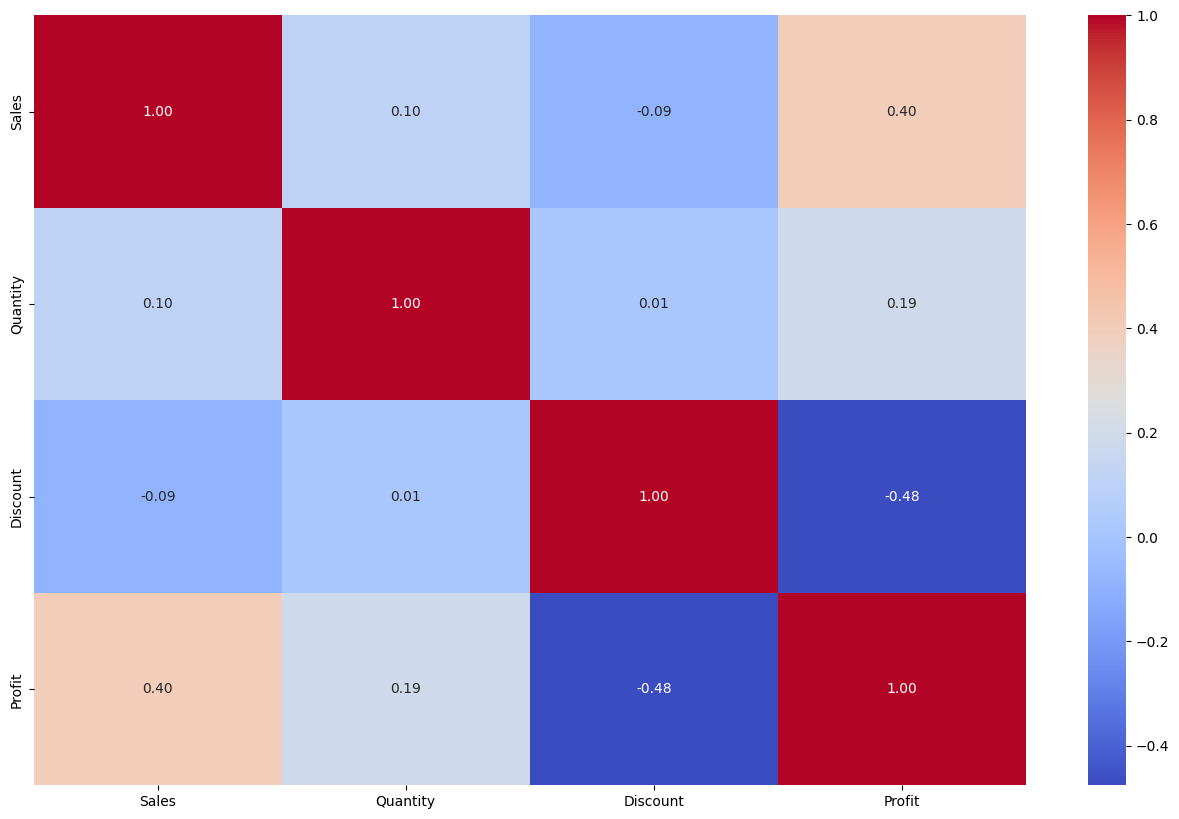

In [473]:
plt.figure(figsize=(16, 10))
sns.heatmap(matriz, annot=True, cmap='coolwarm', fmt=".2f")

La variable más valiosa para predecir, según el mapa, es Profit. El mapa de correlación muestra relaciones clave que un modelo puede explotar:

Correlación Fuerte con Discount (-0.48): Existe una relación negativa moderada. Esto confirma matemáticamente lo que vimos en el EDA a mayor descuento, el profit cae drásticamente. Esta es una señal clara de que el modelo podrá "aprender" esta regla.

Correlación con Sales (0.40): Una relación positiva moderada. Es lógico que a más ventas, más ganancia, pero al no ser una correlación perfecta (1.0), indica que hay otros factores (como los descuentos) que interfieren, lo cual hace que la predicción sea un desafío interesante para el Machine Learning.

Baja correlación con variables logísticas: Variables como demora_envio (0.00) o los métodos de envío tienen casi nulo impacto directo en el Profit, por lo que seran descartardas en modelos simples para evitar ruido.

# Machine learning

# Random Forest Regressor para Profit

Por qué se elegió Random Forest Regressor y no una Regresión Lineal simple?

* La relación entre Descuento y Profit no es una línea recta perfecta. El Random Forest, al usar árboles de decisión, puede crear reglas como: "Si Descuento > 0.5 Y Categoría = Office Supplies, entonces Profit = Muy Bajo".

* El Random Forest es mucho más robusto frente a valores atípicos que otros modelos.

Con este modelo confirmo que Sales y Discount son los predictores dominantes.

In [474]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [475]:
#características (X) y el objetivo (y)

features = [
    'Sales', 'Quantity', 'Discount',
    'Category_Office Supplies', 'Category_Technology'
]

X = df[features]
y = df['Profit']

In [476]:
#División 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [396]:
from sklearn.model_selection import GridSearchCV

# 1. Definimos la "rejilla" de parámetros que queremos probar
param_grid = {
    'n_estimators': [100, 200],          # Número de árboles
    'max_depth': [None, 10, 20],         # Profundidad máxima para evitar sobreajuste
    'min_samples_split': [2, 5, 10],     # Mínimo de muestras para dividir un nodo
    'max_features': ['sqrt', 'log2']     # Cuántas variables considera cada árbol
}

# 2. Configuramos la búsqueda (usamos 3 pliegues de validación cruzada)
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring='r2',
    verbose=2
)

# 3. Entrenamos la búsqueda con tus datos filtrados
grid_search.fit(X_train, y_train)

# 4. Ver los mejores resultados
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor R2 Score en entrenamiento: {grid_search.best_score_:.4f}")

# 5. Evaluar el modelo optimizado con los datos de test
mejor_modelo = grid_search.best_estimator_
y_pred_opt = mejor_modelo.predict(X_test)
print(f"R2 Score Final (Optimizado): {r2_score(y_test, y_pred_opt):.4f}")

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Mejores parámetros: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}
Mejor R2 Score en entrenamiento: 0.6629
R2 Score Final (Optimizado): 0.6616


In [397]:
#Creacion y entrenamiento del modelo optimizado
modelo_final_optimizado = RandomForestRegressor(
    max_depth=10,
    max_features='sqrt',
    min_samples_split=2,
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

modelo_final_optimizado.fit(X_train, y_train)

# Métricas de regresión
print(f"R2 Score: {r2_score(y_test, y_pred_opt):.3f}")
print(f"Error Medio Absoluto (MAE): {mean_absolute_error(y_test, y_pred_opt):.2f}")

R2 Score: 0.662
Error Medio Absoluto (MAE): 4.67


* R^2: 0.66 indica que el modelo explica el 66% de la variación del profit, lo cual es sólido para datos financieros con tanto ruido. Es un valor honesto. En el mundo del retail, el profit depende de demasiadas variables(costos fijos, fletes, devoluciones) que no estan reflejadas en el dataset.

* max_0depth: 10: El modelo aprendió que no necesita árboles infinitamente profundos; con 10 niveles es suficiente para capturar la lógica sin memorizar  errores
* (sobreajuste).max_features: sqrt: Al usar solo la raíz cuadrada de las variables en cada división, el bosque se volvió más diverso y menos sesgado por una sola variable dominante.

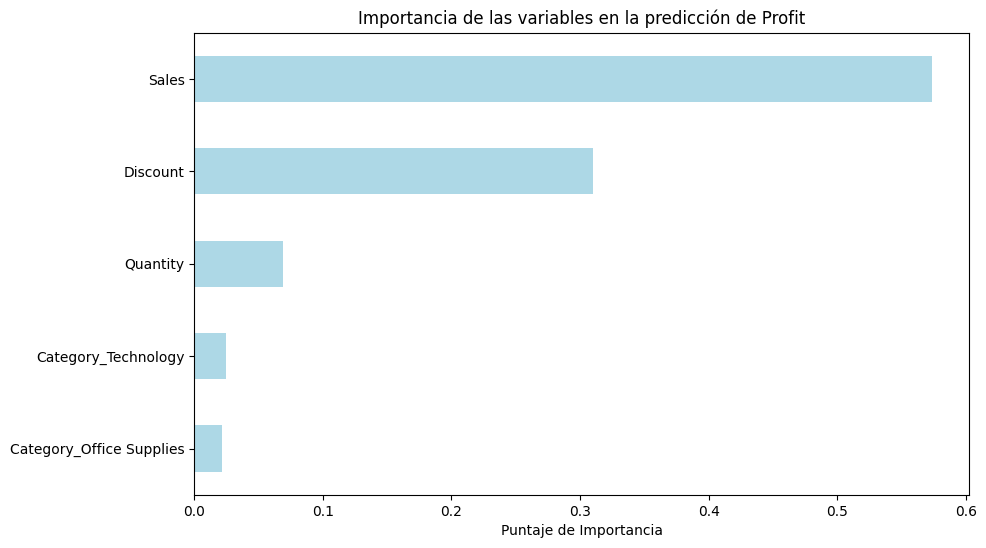

In [481]:
# Grafico: importancia de las variables
plt.figure(figsize=(10, 6))
importancias = pd.Series(modelo_final_optimizado.feature_importances_, index=X.columns)
importancias.sort_values().plot(kind='barh', color='lightblue')
plt.title('Importancia de las variables en la predicción de Profit')
plt.xlabel('Puntaje de Importancia')
plt.show()

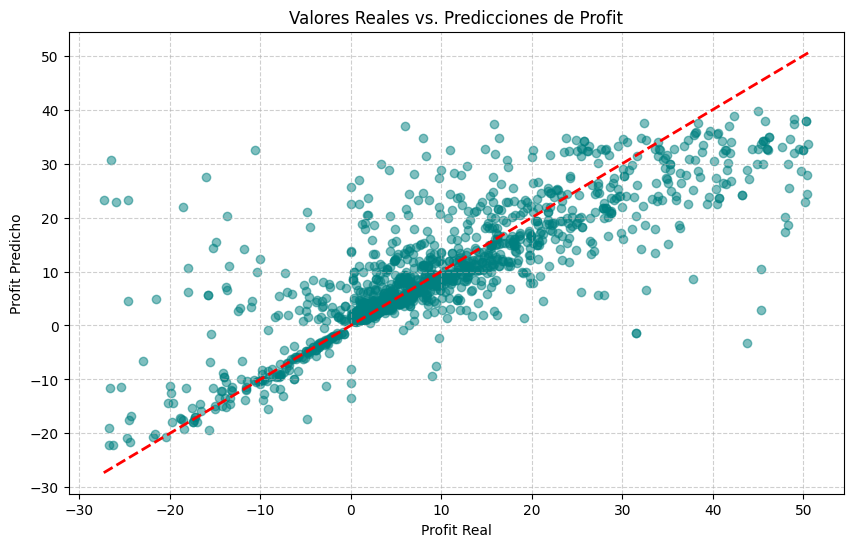

In [399]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_opt, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Valores Reales vs. Predicciones de Profit')
plt.xlabel('Profit Real')
plt.ylabel('Profit Predicho')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

--- TOP 10 ERRORES DE PREDICCIÓN ---
         Real  Prediccion  Error_Absoluto
6321 -26.5410   30.769690       57.310690
5223 -27.2922   23.226738       50.518938
6829 -25.9920   22.931680       48.923680
6577 -24.5880   23.298789       47.886789
234   43.8408   -3.175337       47.016137
1871 -15.9900   27.556499       43.546499
9437 -10.6068   32.492399       43.099199
661   45.3222    2.892863       42.429337
440  -18.5850   22.033467       40.618467
8354  45.2940   10.495162       34.798838


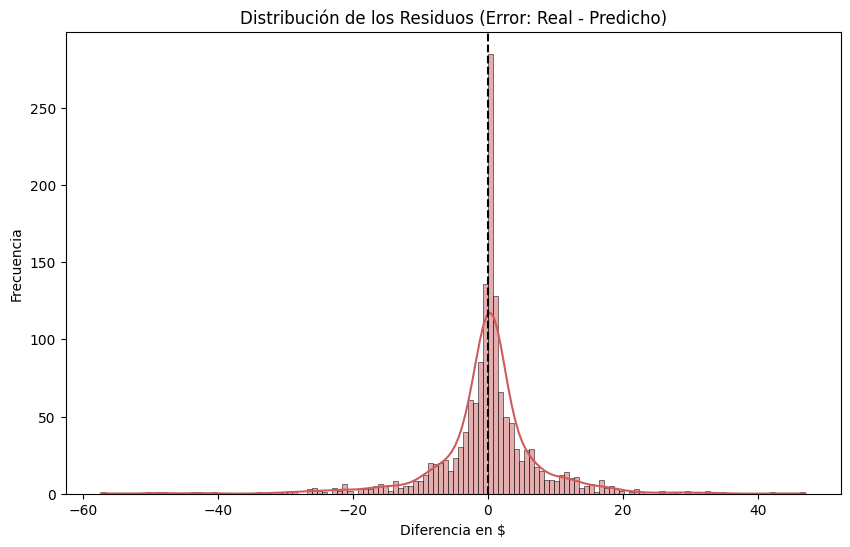

In [400]:
# 1. Crear un DataFrame con los valores reales y las predicciones
resultados = pd.DataFrame({
    'Real': y_test,
    'Prediccion': y_pred_opt,
    'Error_Absoluto': abs(y_test - y_pred_opt)
})

# 2. Obtener los 10 registros con mayor error
top_10_errores = resultados.sort_values(by='Error_Absoluto', ascending=False).head(10)

# 3. Mostrar la tabla
print("--- TOP 10 ERRORES DE PREDICCIÓN ---")
print(top_10_errores)

# 4. Graficar la distribución del error
plt.figure(figsize=(10, 6))
sns.histplot(resultados['Real'] - resultados['Prediccion'], kde=True, color='indianred')
plt.axvline(0, color='black', linestyle='--')
plt.title('Distribución de los Residuos (Error: Real - Predicho)')
plt.xlabel('Diferencia en $')
plt.ylabel('Frecuencia')
plt.show()

1. Distribución Centrada: La campana está perfectamente alineada con la línea punteada en 0. Significa que el modelo es insesgado. No tiene una tendencia sistemática a predecir siempre de más o siempre de menos.Forma de la Campana: La curva roja (KDE) indica que la gran mayoría de las predicciones tienen un error cercano a cero.
2. Magnitud del error: El pico más alto (la moda) se encuentra entre -2 y 2 dólares. Esto sugiere que para el grueso de las ventas, el modelo es extremadamente preciso.Rango La mayor parte de la masa de datos se concentra entre -10 y +10. Considerando ventas y profits que pueden ser de cientos o miles de dólares, un error de ±10 es un margen muy aceptable.
3. Outliers: Las colas largas que se extienden hasta -60 y +40 son los registros donde el modelo "falló" por un margen mayor. Es muy probable que esos errores de -40 o -60 correspondan a los casos de la Región Central con descuentos del 80%. Como esos casos son extremos y menos frecuentes, al modelo le cuesta más "encajarlos" en la regla general, produciendo un residuo más grande.
4. Al ver que los errores se agrupan tan fuertemente en el cero, confirmas que el modelo ha capturado la lógica principal de los datos.Validación del R² de 0.66: Este gráfico explica por qué tu R^2 es de 0.66 y no de 0.99. Aunque el 90% de las veces el error es mínimo (el centro del gráfico), esos errores que llegan a 60 (las colas) son los que penalizan la métrica final.

**Conclusión del grafico**

El modelo es confiable para la toma de decisiones generales, ya que sus errores son mayoritariamente pequeños y están balanceados. Sin embargo, para los casos de descuentos extremos detectados en los análisis previos, el modelo pierde precisión, lo que refuerza tu recomendación de eliminar o limitar esos descuentos por ser impredecibles y dañinos para el profit.

# Modelo para predecir la probabilidad de retraso

En mi mapa de calor se puede observar que el tipo de envio influye en el retraso
* demora_envio ↔ Ship Mode Standard → 0.73

* demora_envio ↔ Same Day → -0.53


A continuacion se va a realizar un modelo de clasificación para predecir:
¿Este pedido se va a retrasar o no?

In [401]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## **Selección de Variables**

In [402]:
#variables con mayor correlación e importancia según tus gráficos
features_clasificacion = [
    'Sales', 'Quantity', 'Discount', 'Order Month', 'es_feriado',
    'Category_Office Supplies', 'Category_Technology',
    'Region_East', 'Region_South', 'Region_West',
    'Ship Mode_Same Day', 'Ship Mode_Standard Class'
]

X_c = df[features_clasificacion]
y_c = df['retrasado'] # Variable objetivo(binaria)

# División 80/20
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.2, random_state=42, stratify=y_c)

## **Entrenamiento**

In [403]:
# Creamos el bosque de clasificación
# Usamos class_weight='balanced' porque suele haber menos retrasos que pedidos a tiempo
modelo_retraso = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
modelo_retraso.fit(X_train_c, y_train_c)

RandomForestClassifier(class_weight='balanced', random_state=42)

# Evaluacion del resultado

In [404]:
y_pred_c = modelo_retraso.predict(X_test_c)

print("--- REPORTE DE CLASIFICACIÓN ---")
print(classification_report(y_test_c, y_pred_c))

--- REPORTE DE CLASIFICACIÓN ---
              precision    recall  f1-score   support

       False       0.68      0.74      0.71       907
        True       0.52      0.44      0.48       580

    accuracy                           0.62      1487
   macro avg       0.60      0.59      0.59      1487
weighted avg       0.62      0.62      0.62      1487



#Matriz de confusion

<Figure size 800x600 with 0 Axes>

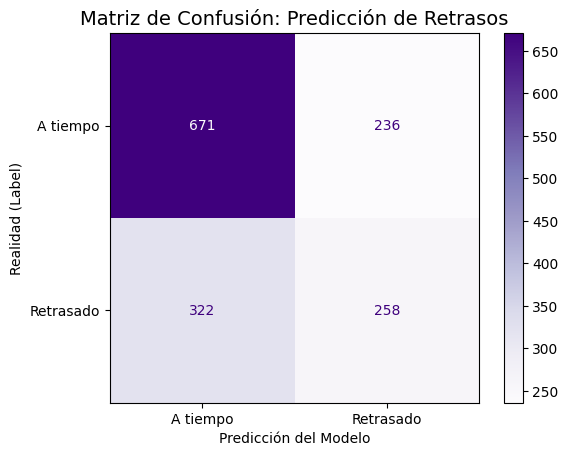

In [405]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_c, y_pred_c)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['A tiempo', 'Retrasado'])
disp.plot(cmap='Purples', values_format='d')

plt.title('Matriz de Confusión: Predicción de Retrasos', fontsize=14)
plt.xlabel('Predicción del Modelo')
plt.ylabel('Realidad (Label)')
plt.show()

Verdaderos Negativos (Arriba-Izquierda): Se lograron identificar correctamente a 671 pedidos (74% de recall) que llegaron a tiempo. El modelo es bastante sólido reconociendo una operación normal.

Verdaderos Positivos (Abajo-Derecha): Identificaste 255 retrasos reales (44% de recall). Aquí está tu valor agregado: son 255 clientes a los que podrías haberles avisado proactivamente del problema.

Falsos Positivos (Arriba-Derecha): El modelo dio "falsa alarma" en 236 casos. Son pedidos que iban a llegar bien, pero el modelo predijo retraso. Esto puede generar costos operativos innecesarios si se toman medidas de emergencia.

Falsos Negativos (Abajo-Izquierda): Este es el punto más crítico. 325 retrasos pasaron "bajo el radar" del modelo. El cliente recibió su pedido tarde sin que el sistema lo previera.

Dado que la precisión para los retrasos es del 52%, el modelo es útil como una primera señal de alerta, pero no es infalible. El envio Standard Class tiene una correlación de 0.73 con la demora, es probable que la mayoría de esos "Verdaderos Positivos" pertenezcan a ese modo de envío.